In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner 
# import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
import cartopy.io.shapereader as shpreader

In [2]:
file = './rhum.mon.mean.nc'
dataset = nc.Dataset(file)
# print(dataset.variables.keys())

longitude, latitude = dataset.variables['lon'],dataset.variables['lat']
time = dataset.variables['time']
level =dataset.variables['level']
rhum = dataset.variables['rhum']

In [160]:
rhum[:1,3:4].data

array([[[[71.229996, 71.229996, 71.229996, ..., 71.229996, 71.229996,
          71.229996],
         [56.710007, 55.839996, 55.089996, ..., 59.460007, 58.539993,
          57.660004],
         [57.800003, 58.910004, 60.069992, ..., 55.369995, 56.03    ,
          56.819992],
         ...,
         [80.97    , 84.36    , 87.11    , ..., 68.520004, 73.19    ,
          77.17999 ],
         [80.89    , 81.5     , 82.      , ..., 77.75    , 78.95999 ,
          80.05    ],
         [79.42    , 79.42    , 79.42    , ..., 79.42    , 79.42    ,
          79.42    ]]]], dtype=float32)

In [166]:
rhum[419:420,3:4].shape

(1, 1, 73, 144)

In [24]:
(1999-1948+1)*12 +12

636

In [18]:
(1999 - 1980) * 12

228

In [26]:
396+240-903

-267

In [ ]:
# time从1948年1月开始计算，903/12为75余3，正好是2023年3月
# 第一阶段从(1980 - 1948 + 1) * 12 = 396 开始到 612结束
# 因为列表从0开始计算，故第一阶段时间区间为[396, 636]
num_month = time[:].data.shape[0] # 时间的size
num_month_first = (1999 - 1980 + 1) * 12 #计算1980年1月到1999年12月的240月数
# 第二阶段从624开始到 900结束
# 因为列表从0开始计算，故第一阶段时间区间为[637, 903]
num_month_second = (2022 - 2000 + 1) * 12 + 3 #计算1998年1月到2021年12月的267月数


In [29]:
def rh_mean(rhum, begin_month, num_month):
    """
    rh: 计算的图表，begin_month：开始月份 num_month：每个阶段的月数
    """
    sum_month = np.zeros(rhum[:1,3:4].data[0][:,:].shape, dtype=float, order='C')  # 创建空矩阵
    sum_month_tmp = sum_month
    count = 0
    mean = sum_month
    for i in range(begin_month, begin_month + num_month): 
        temp_pre = rhum[i:i+1,3:4].data[0][:,:]
    #     ls_first.append(sst[i:i+1].data[0][:1,-1:])
        sum_month_tmp += temp_pre
        count += 1
    mean = sum_month_tmp / num_month
    return mean



In [32]:
mean_first = rh_mean(rhum, 419, 240)
mean_second = rh_mean(rhum, 637, 266)
diff = mean_second - mean_first 

In [4]:
# time从1948年1月开始计算，903/12为75余3，正好是2023年3月
# 第一阶段从(1982 - 1948 + 1) * 12 =420 开始到 612结束
# 因为列表从0开始计算，故第一阶段时间区间为[419, 611]
num_month = time[:].data.shape[0] # 时间的size
num_month_1997to1982 = (1998 - 1982) * 12 #计算1982年1月到1997年12月的192月数
# 第二阶段从613开始到 900结束
# 因为列表从0开始计算，故第一阶段时间区间为[612, 899]
num_month_2021to1998 = (2022 - 1998) * 12 #计算1998年1月到2021年12月的288月数

# 选择level是700
# 创建三纬空矩阵(time, lat, lon)
sum_month = np.zeros(rhum[:1,3:4].data[0][:,:].shape, dtype=float, order='C') 
sum_month_1982to1997 = sum_month
count = 0
ls_first = []
mean_1982to1997 = sum_month
# 循环时间
for i in range(420, 612): 
    temp_pre = rhum[i:i+1,3:4].data[0][:,:]
#     ls_first.append(sst[i:i+1].data[0][:1,-1:])
    sum_month_1982to1997 += temp_pre
    count += 1
mean_1982to1997 = sum_month_1982to1997 / num_month_1997to1982

sum_month = np.zeros(rhum[:1,3:4].data[0][:,:].shape, dtype=float, order='C')  # 创建空矩阵
sum_month_1998to2021 = sum_month
count = 0
ls_first = []
mean_1998to2021 = sum_month
for i in range(612, 899): 
    temp_pre = rhum[i:i+1,3:4].data[0][:,:]
#     ls_first.append(sst[i:i+1].data[0][:1,-1:])
    sum_month_1998to2021 += temp_pre
    count += 1
mean_1998to2021 = sum_month_1998to2021 / num_month_2021to1998

diff = mean_1998to2021 - mean_1982to1997

In [186]:
# 确定时间是从1月开始计算
# 一年月时间为[31.0,28.0, 31.0, 30.0, 31.0, 30.0, 31.0, 31.0, 30.0, 31.0, 30.0, 31.0]
ls = []
for i in range(420, 612):
    tmp = time[i+1] - time[i]
    ls.append(tmp/24)
    


In [33]:
print(diff.min(), diff.max())

-11.09969954837235 12.124859734824426


73


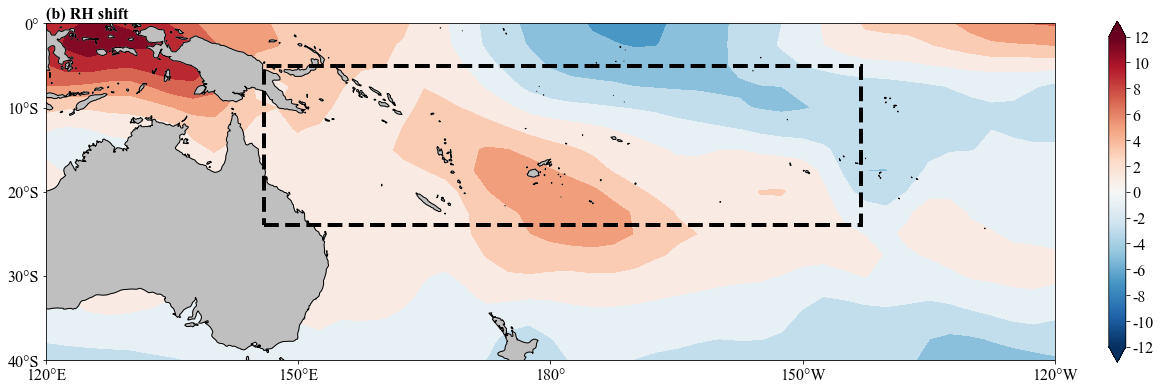

In [37]:
from matplotlib import colors,cm
import matplotlib as mpl
import cmaps
from matplotlib.colors import ListedColormap 

from matplotlib import rcParams
from matplotlib import patches

# 设置字体
config = {
    "font.family": 'Times New Roman',
    "font.size": 16,
    "mathtext.fontset":'stix',
    'axes.unicode_minus': False 
         }
rcParams.update(config)

MAX = 12.01
MIN = -12
INTER = 2

# 设置经纬度
# lon = longitude[:].data
lon = np.append(longitude[:].data, [360.0])
lat = latitude[:].data

print(len(lat))
# 调整经纬度 向东偏移180
# lon_pacific = lon[:] + 180
# a, b = np.hsplit(diff, [179])
# diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
diff_2d = diff[0]
new_diff=[]
for i in range(diff_2d.shape[0]):
    tmp = np.append(diff_2d[i], diff_2d[i][0])
    new_diff.append(tmp.tolist())
new_diff = np.array(new_diff)

fig = plt.figure(figsize=(15,5))

proj = ccrs.PlateCarree(central_longitude=180)
# proj = ccrs.PlateCarree()
leftlon, rightlon, lowerlat, upperlat = (120,240, -40, 0)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('(b) RH shift',loc='left',fontsize =16, fontweight='bold')

cont = fig_ax1.contourf(lon, lat, new_diff, 
                 levels=np.arange(MIN, MAX, INTER), # 颜色分片
                        zorder=0,
                transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)
# fig_ax1.contourf(lon, lat, diff,levels=[0,0.05,1], zorder=1, hatches=['....',None],colors="none", transform=ccrs.PlateCarree())

black_quarter = patches.Rectangle((146,-24),71,19,linestyle = 'dashed', 
                                  lw=4, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
fig_ax1.add_patch(black_quarter)

norm = colors.Normalize(vmin=MIN, vmax=MAX)    #确定colormap的最大最小值

cmap=plt.cm.RdBu_r  #引用NCL的colormap

# newcolors=cmap(np.linspace(-14,15,9))#分片操作，生成0到1的12个数据间隔的数组   

# newcmap=ListedColormap(newcolors[::])  #重构为新的colormap

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,
                                       cmap=plt.cm.RdBu_r
#                                        cmap = newcmap
                                      ),
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(MIN, MAX, INTER).tolist(), # colorbar分片                                                 
                 extend='both',
                fraction=0.0158) 

# plt.colorbar(cont,fraction=0.012)

plt.savefig("rh_20231204.png",dpi=300,bbox_inches='tight')
plt.show()

In [318]:
diff_2d = diff[0]
new_diff=[]
for i in range(diff_2d.shape[0]):
    tmp = np.append(diff_2d[i], diff_2d[i][0])
    new_diff.append(tmp.tolist())
new_diff = np.array(new_diff)

In [324]:
new_diff[:,-1:]

array([[ 3.75077195e-01],
       [ 1.49002541e+00],
       [ 9.37403176e-02],
       [-4.14718231e-01],
       [-1.35160662e+00],
       [-1.19115846e+00],
       [-6.69007328e-01],
       [-1.23039231e+00],
       [-1.76958479e+00],
       [-8.56280353e-01],
       [-1.29055753e+00],
       [-2.73414720e+00],
       [-1.56742235e+00],
       [-1.94118794e+00],
       [-2.31703949e+00],
       [-4.75094040e-01],
       [-2.38159961e-01],
       [-5.93695376e-01],
       [-2.54252990e-01],
       [ 2.15683579e-01],
       [ 8.80631142e-01],
       [ 8.33944480e-03],
       [-1.79987695e+00],
       [-2.06926825e+00],
       [-9.58891140e-01],
       [ 9.43367283e-02],
       [ 1.16153384e+00],
       [ 2.08048392e+00],
       [ 3.27435108e+00],
       [ 4.39966225e+00],
       [ 3.99318569e+00],
       [ 2.67184301e+00],
       [ 1.20261498e+00],
       [ 1.32940290e+00],
       [ 2.18533480e+00],
       [ 1.41467994e+00],
       [-2.50488215e-01],
       [-1.15606632e+00],
       [-1.0

In [323]:
diff[0][:,:1]

array([[ 3.75077195e-01],
       [ 1.49002541e+00],
       [ 9.37403176e-02],
       [-4.14718231e-01],
       [-1.35160662e+00],
       [-1.19115846e+00],
       [-6.69007328e-01],
       [-1.23039231e+00],
       [-1.76958479e+00],
       [-8.56280353e-01],
       [-1.29055753e+00],
       [-2.73414720e+00],
       [-1.56742235e+00],
       [-1.94118794e+00],
       [-2.31703949e+00],
       [-4.75094040e-01],
       [-2.38159961e-01],
       [-5.93695376e-01],
       [-2.54252990e-01],
       [ 2.15683579e-01],
       [ 8.80631142e-01],
       [ 8.33944480e-03],
       [-1.79987695e+00],
       [-2.06926825e+00],
       [-9.58891140e-01],
       [ 9.43367283e-02],
       [ 1.16153384e+00],
       [ 2.08048392e+00],
       [ 3.27435108e+00],
       [ 4.39966225e+00],
       [ 3.99318569e+00],
       [ 2.67184301e+00],
       [ 1.20261498e+00],
       [ 1.32940290e+00],
       [ 2.18533480e+00],
       [ 1.41467994e+00],
       [-2.50488215e-01],
       [-1.15606632e+00],
       [-1.0